### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.15.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [0]:
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
labels = []

Labels for each image
[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


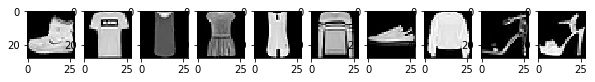

In [14]:
plt.figure(figsize=(10,5))
columns = 10
for i in range(0,10):
    plt.subplot(10 / columns + 1, columns, i + 1)
    plt.imshow(trainX[i],cmap='gray',)
    labels.append(np.argmax(trainY[i]))
print('Labels for each image')
print(labels)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

W1110 09:13:35.447760 140128811198336 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Execute the model using model.fit()

In [16]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/sample - loss: 2080.5945 - acc: 0.7409 - val_loss: 1289.8372 - val_acc: 0.7991
Epoch 2/50
60000/60000 [==============================] - 2s 39us/sample - loss: 1646.9322 - acc: 0.7807 - val_loss: 1086.4038 - val_acc: 0.8050
Epoch 3/50
60000/60000 [==============================] - 2s 39us/sample - loss: 1621.4382 - acc: 0.7837 - val_loss: 1954.6833 - val_acc: 0.8006
Epoch 4/50
60000/60000 [==============================] - 2s 38us/sample - loss: 1569.0645 - acc: 0.7899 - val_loss: 1507.5453 - val_acc: 0.7741
Epoch 5/50
60000/60000 [==============================] - 2s 39us/sample - loss: 1512.1228 - acc: 0.7941 - val_loss: 1320.6494 - val_acc: 0.7761
Epoch 6/50
60000/60000 [==============================] - 2s 39us/sample - loss: 1533.5692 - acc: 0.7936 - val_loss: 1424.9272 - val_acc: 0.8060
Epoch 7/50
60000/60000 [==============================] - 2s 39us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [18]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5967 - acc: 0.7936 - val_loss: 0.5150 - val_acc: 0.8262
Epoch 2/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4922 - acc: 0.8298 - val_loss: 0.5083 - val_acc: 0.8282
Epoch 3/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4733 - acc: 0.8365 - val_loss: 0.4878 - val_acc: 0.8338
Epoch 4/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4593 - acc: 0.8416 - val_loss: 0.4706 - val_acc: 0.8385
Epoch 5/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4526 - acc: 0.8428 - val_loss: 0.4690 - val_acc: 0.8389
Epoch 6/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4482 - acc: 0.8436 - val_loss: 0.4797 - val_acc: 0.8400
Epoch 7/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4403 - acc: 0.8479 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.9245 - acc: 0.6803 - val_loss: 0.6933 - val_acc: 0.7651
Epoch 2/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.6396 - acc: 0.7798 - val_loss: 0.6124 - val_acc: 0.7927
Epoch 3/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5861 - acc: 0.7967 - val_loss: 0.5882 - val_acc: 0.8047
Epoch 4/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5554 - acc: 0.8075 - val_loss: 0.5697 - val_acc: 0.8112
Epoch 5/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5377 - acc: 0.8135 - val_loss: 0.5365 - val_acc: 0.8176
Epoch 6/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5264 - acc: 0.8180 - val_loss: 0.5356 - val_acc: 0.8210
Epoch 7/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5136 - acc: 0.8230 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.03)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

In [0]:
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [26]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=50,
          batch_size=30)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 90us/sample - loss: 1.8835 - acc: 0.3426 - val_loss: 1.4802 - val_acc: 0.5848
Epoch 2/50
60000/60000 [==============================] - 5s 89us/sample - loss: 1.1921 - acc: 0.6306 - val_loss: 0.9630 - val_acc: 0.7023
Epoch 3/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.8439 - acc: 0.7307 - val_loss: 0.7175 - val_acc: 0.7607
Epoch 4/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.6824 - acc: 0.7650 - val_loss: 0.6173 - val_acc: 0.7830
Epoch 5/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6074 - acc: 0.7837 - val_loss: 0.5665 - val_acc: 0.7944
Epoch 6/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5612 - acc: 0.7961 - val_loss: 0.5332 - val_acc: 0.8028
Epoch 7/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5267 - acc: 0.8063 - val_loss: 0.